In [1]:
library(DirichletMultinomial)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks BiocGenerics::combine()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks IRanges::slice()


In [3]:
fname='/home/hsher/scratch/circ_nextera_iter13/output/edits/APOBEC1only.dp4.neg.vcf.aggregated.nonzero.tsv'

In [4]:
count_df = read_tsv(fname)

Rows: 338572 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
nread=30
count_df <- count_df[count_df$n_ref+count_df$n_alt>nread,]

In [14]:
head(count_df)

pos_id,n_ref,n_alt
<chr>,<dbl>,<dbl>
GL000195.1:48444|49119:571,38,8
GL000195.1:48955|79328:1056,62,1
GL000195.1:48955|79328:1063,67,4
GL000195.1:48955|79328:1067,69,1
GL000195.1:48955|79328:1090,75,2
GL000195.1:48955|79328:1099,79,2


In [15]:
count <- as.matrix(count_df[c('n_alt','n_ref')])

In [21]:
full <- TRUE ### TODO: change to TRUE

min_component = 1
max_component = 5
component_gap = 1
comp_attempt = seq(min_component, max_component, component_gap)

In [18]:
basedir='/home/hsher/scratch/circ_nextera_iter13_bbm'
out_stem='APOBEC1only.dp4.neg'

In [26]:
library(parallel)

if (full) {
fit <- lapply(comp_attempt, dmn, count=count, verbose=TRUE)
save(fit, file=file.path(basedir, paste0(out_stem, ".fit.rda")))
} else load(file = file.path(basedir, paste0(out_stem, ".fit.rda")))


dmn, k=1



  Soft kmeans
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=2



  Soft kmeans
    iteration 10 change 0.054174
    iteration 20 change 0.026607
    iteration 30 change 0.000001
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 9.030664
    iteration 20 change 0.132242
    iteration 30 change 0.003297
    iteration 40 change 0.000494
  Hessian


dmn, k=3



  Soft kmeans
    iteration 10 change 0.143257
    iteration 20 change 0.004690
    iteration 30 change 0.000395
    iteration 40 change 0.000030
    iteration 50 change 0.000002
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 10.024518
    iteration 20 change 6.446759
    iteration 30 change 4.508158
    iteration 40 change 3.204074
    iteration 50 change 2.244821
    iteration 60 change 1.533680
    iteration 70 change 1.027752
    iteration 80 change 0.678768
    iteration 90 change 0.443971
    iteration 100 change 0.288651
  Hessian


dmn, k=4



  Soft kmeans
    iteration 10 change 0.158033
    iteration 20 change 0.004136
    iteration 30 change 0.001523
    iteration 40 change 0.002077
    iteration 50 change 0.001041
    iteration 60 change 0.000489
    iteration 70 change 0.000227
    iteration 80 change 0.000105
    iteration 90 change 0.000048
    iteration 100 change 0.000022
    iteration 110 change 0.000010
    iteration 120 change 0.000005
    iteration 130 change 0.000002
    iteration 140 change 0.000001
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 4.693935
    iteration 20 change 2.132024
    iteration 30 change 1.252667
    iteration 40 change 0.681796
    iteration 50 change 0.303200
    iteration 60 change 0.115557
    iteration 70 change 0.046199
    iteration 80 change 0.020937
    iteration 90 change 0.011549
    iteration 100 change 0.010630
  Hessian


dmn, k=5



  Soft kmeans
    iteration 10 change 0.196366
    iteration 20 change 0.004011
    iteration 30 change 0.006639
    iteration 40 change 0.002764
    iteration 50 change 0.001226
    iteration 60 change 0.000606
    iteration 70 change 0.000313
    iteration 80 change 0.000164
    iteration 90 change 0.000087
    iteration 100 change 0.000046
    iteration 110 change 0.000024
    iteration 120 change 0.000013
    iteration 130 change 0.000007
    iteration 140 change 0.000004
    iteration 150 change 0.000002
    iteration 160 change 0.000001
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 7.108067
    iteration 20 change 3.123060
    iteration 30 change 1.859127
    iteration 40 change 1.361321
    iteration 50 change 1.109363
    iteration 60 change 0.945401
    iteration 70 change 0.818153
    iteration 80 change 0.713312
    iteration 90 change 0.623746
    iteration 100 change 0.545752
  Hessian


In [38]:
lplc <- sapply(fit, laplace)
aic <- sapply(fit, AIC)
bic <- sapply(fit, BIC)
 pdf(file.path(basedir, paste0(out_stem, ".goodness_of_fit.pdf")))
 plot(aic, type="b", xlab="Number of Dirichlet Components(k)",ylab="AIC")
 plot(bic, type="b", xlab="Number of Dirichlet Components(k)",ylab="BIC")
 plot(lplc, type="b", xlab="Number of Dirichlet Components(k)",ylab="Model Fit(Laplace)")
 dev.off()

  # find the best model: the DMN object
 (best <- fit[[which.min(bic)]])

png 
  2

class: DMN 
k: 4 
samples x taxa: 140396 x 2 
Laplace: 315199.6 BIC: 315195.5 AIC: 315141.3 

In [39]:
best

class: DMN 
k: 4 
samples x taxa: 140396 x 2 
Laplace: 315199.6 BIC: 315195.5 AIC: 315141.3 

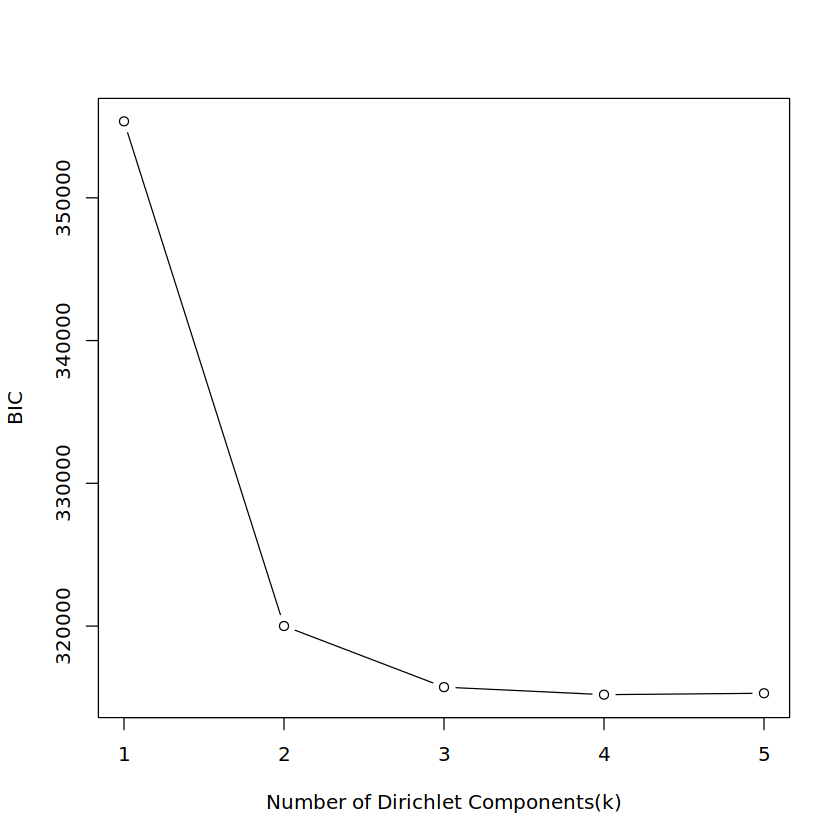

In [40]:
plot(bic, type="b", xlab="Number of Dirichlet Components(k)",ylab="BIC")

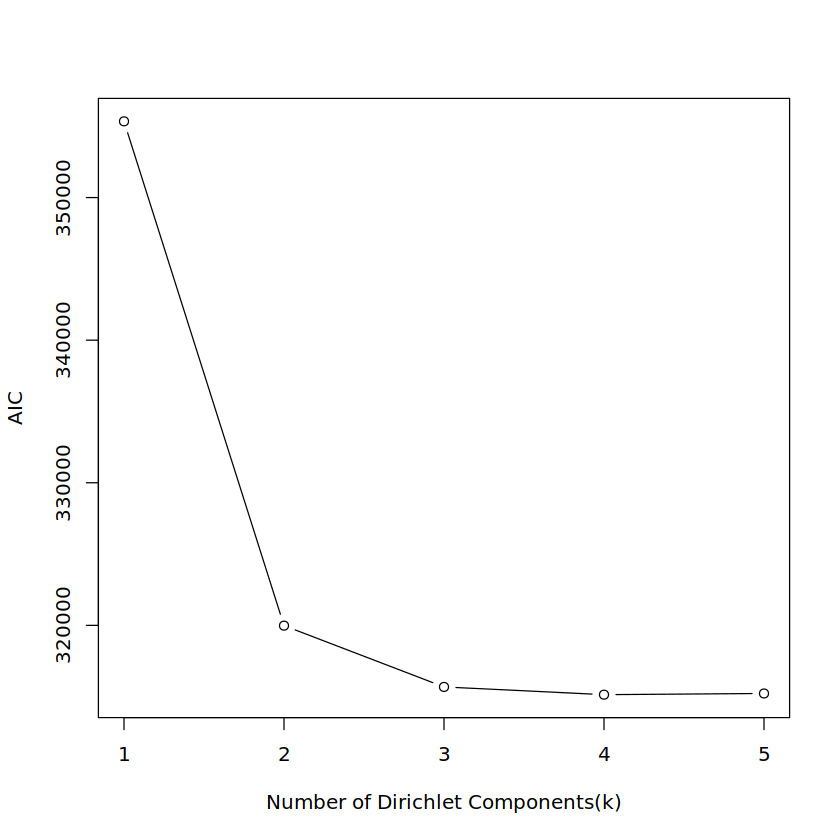

In [41]:
plot(aic, type="b", xlab="Number of Dirichlet Components(k)",ylab="AIC")

In [42]:
fitted(best, scale = TRUE)

n_alt,0.0171371,0.05071248,0.1589427,0.8160665
n_ref,0.9828629,0.94928752,0.8410573,0.1839335


In [43]:
weights = mixturewt(best)

In [44]:
weights

pi,theta
<dbl>,<dbl>
0.609852412,376.3092518
0.335248066,62.7658570
0.047848327,9.9081199
0.007051195,0.7665906


In [50]:
count_df['cluster']<-c(mixture(best, assign = TRUE))

In [51]:
count_df

pos_id,n_ref,n_alt,cluster
<chr>,<dbl>,<dbl>,<int>
GL000195.1:48444|49119:571,38,8,2
GL000195.1:48955|79328:1056,62,1,1
GL000195.1:48955|79328:1063,67,4,2
GL000195.1:48955|79328:1067,69,1,1
GL000195.1:48955|79328:1090,75,2,1
GL000195.1:48955|79328:1099,79,2,1
GL000195.1:48955|79328:112,120,4,1
GL000195.1:48955|79328:127,99,8,2
GL000195.1:48955|79328:28981,30,2,2


In [74]:
hek='/home/hsher/scratch/circ_nextera_iter2/output/edits/HEK_rar11.dp4.neg.vcf.aggregated.nonzero.tsv'
hek_df = read_tsv(hek)

hek2='/home/hsher/scratch/circ_nextera/output/edits/circseq-bm-rar11-nxt.dp4.neg.vcf.aggregated.nonzero.tsv'
hek2_df = read_tsv(hek2)

Rows: 336580 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 247011 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [77]:
count_df['is_in_hek293']=count_df$pos_id %in% c(hek_df$pos_id)
count_df['is_in_hek293_2']=count_df$pos_id %in% c(hek2_df$pos_id)

In [76]:
sum(count_df$is_in_hek293)

[1] 2659

In [80]:
aggregate(count_df[, c('is_in_hek293', 'is_in_hek293_2')], list(count_df$cluster), mean)

Group.1,is_in_hek293,is_in_hek293_2
<int>,<dbl>,<dbl>
1,0.01589206,0.01387263
2,0.01269898,0.01222646
3,0.07247735,0.07810059
4,0.44337349,0.46746988


In [85]:
sum(count_df[count_df$is_in_hek293, c('n_ref')])

[1] 297383

In [86]:
sum(count_df[count_df$is_in_hek293, c('n_alt')])

[1] 39606

In [87]:
39606/297383

[1] 0.1331818